In [1]:
from utils import *
from matplotlib.ticker import FormatStrFormatter

In [2]:
# Works for angle = pi
def cartesian_evo(t, x0):
    x, y, z = x0
    mid = (x + z)/ 2
    dist = (z - x) /2
    cost = np.cos(2*t)
    sint = np.sin(2*t)
    
    # Define functions
    x = mid - dist * cost
    y = - np.sqrt(2) * dist * sint
    z = mid + dist * cost
    return (x,y,z)

# Hadamard Hamiltonian

In [3]:
def cart_bloch_near_0():
    phi, delta = randang(), randang()
    r = np.random.uniform(np.sqrt(0.9), 1)
    # State form
    z0 = np.array([r * np.exp(1j * delta), np.sqrt(1 - r**2) * np.exp(1j * phi)])
    x0 = state_to_bloch([z0[0]], [z0[1]])
    # Cartesian form
    X0 = x0[0] + x0[1] + x0[2]
    return X0, z0

def cart_bloch_near_1():
    phi, delta = randang(), randang()
    r = np.random.uniform(0, np.sqrt(0.1))
    # State form
    z0 = np.array([r * np.exp(1j * delta), np.sqrt(1 - r**2) * np.exp(1j * phi)])
    x0 = state_to_bloch([z0[0]], [z0[1]])
    # Cartesian form
    X0 = x0[0] + x0[1] + x0[2]
    return X0, z0

def start_near_0():
    # State form
    z0 = np.array([np.sqrt(0.9), -np.sqrt(0.1)])
    x0 = state_to_bloch([z0[0]], [z0[1]])
    # Cartesian form
    X0 = x0[0] + x0[1] + x0[2]
    return X0, z0

def start_near_1():
    # State form
    z0 = np.array([np.sqrt(0.1), -np.sqrt(0.9)])
    x0 = state_to_bloch([z0[0]], [z0[1]])
    # Cartesian form
    X0 = x0[0] + x0[1] + x0[2]
    return X0, z0

start_points = []
for i in range(2):
    start_points.append(cart_bloch_near_0())

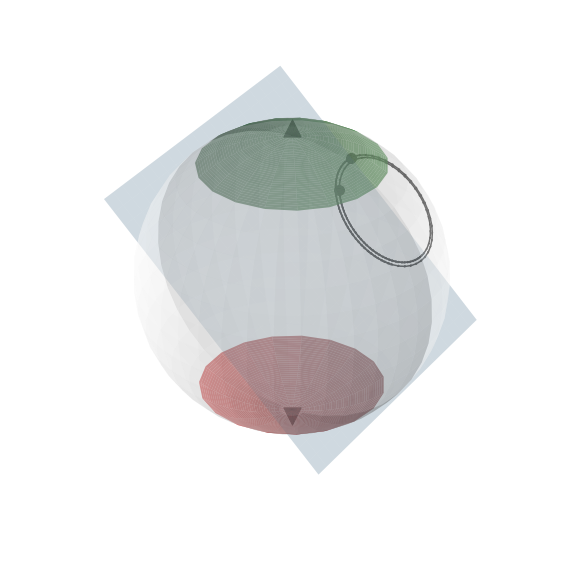

In [4]:
# %matplotlib widget
%matplotlib inline

step = 0.1
t0 = 0
t = 2*np.pi
dXdt = lambda x, t: np.array([-x[1], (x[0] - x[2]), x[1]])

trange = np.arange(t0, t, step=step)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d',box_aspect=(1,1,1))

plot_H_bloch_regions(ax, True)

for X0, Z0 in start_points:
    dataSet, ts = rk4(X0, t0, t, step, dXdt)
    dataSet = dataSet.T
    xps, yps, zps = dataSet[0], dataSet[1], dataSet[2]

    # ax.plot(xps,yps,zps, label=str(X0), color='black', ls='--')
    plt.quiver(xps[:-1], yps[:-1], zps[:-1], xps[1:]-xps[:-1], yps[1:]-yps[:-1], zps[1:]-zps[:-1], color='black')
    ax.scatter(dataSet.T[0][0],dataSet.T[0][1],dataSet.T[0][2], label=str(dataSet.T[0]), s=100, c='black')
    a = cartesian_evo(np.pi/2,X0)
    b = cartesian_evo(np.pi/2 + 0.01,X0)
    
    z_vec, o_vec = get_states(trange, Z0, had_ham)
    xs, ys, zs, _ = state_to_bloch(z_vec, o_vec)
    if False:
        print("Avg error:")
        for z in [zip(xs, xps), zip(ys, yps), zip(zs,zps)]:
            avg_error = np.mean([abs(i-j) for i,j in z])
            print(avg_error)


plt.axis('off')

# with mpl.cbook.get_sample_data("ket0.png") as file:
#     arr_img0 = plt.imread(file)
# with mpl.cbook.get_sample_data("ket1.png") as file:
#     arr_img1 = plt.imread(file)
# imgs = [arr_img0, arr_img1]
# from ImageAnnotations3D import ImageAnnotations3D
# ax2 = fig.add_subplot(111,frame_on=False)
# ax2.axis("off")
# ax2.axis([0,1,0,1])
# ia = ImageAnnotations3D([[0,0,1.05],[0,0,-1.05]],imgs,ax, ax2 )

fig.tight_layout()
# plt.legend()
# save('normal_bloch.png')
# ax.set_yticks([])
# ax.set_ylabel('')
# ax.azim = -90
# ax.elev = 1
# save('side_bloch.png')

# ax.set_zticks([])
# ax.set_zlabel('')
# ax.azim = 270
# ax.elev = 90
# save('above_bloch.png')

plt.show()

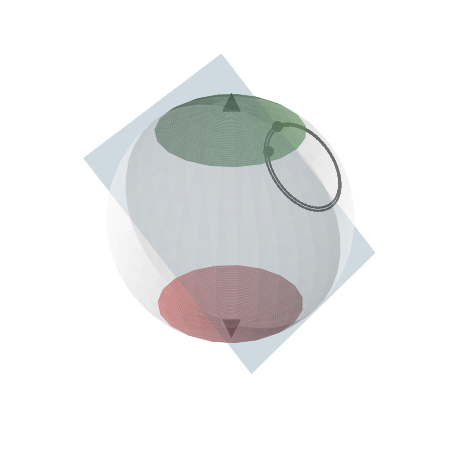

In [5]:
%matplotlib inline

dXdt = lambda x, t: np.sqrt(2) * np.array([-x[1], (x[0] - x[2]), x[1]]) + np.array([0,0,0])

trange = np.arange(t0, t, step=step)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d',box_aspect=(1,1,1))

plot_H_bloch_regions(ax, True)

# start_points = []
# for i in range(2):
#     start_points.append(cart_bloch_init())

for X0, Z0 in start_points:
    dataSet, ts = rk4(X0, t0, t, step, dXdt)
    dataSet = dataSet.T
    xps, yps, zps = dataSet[0], dataSet[1], dataSet[2]

    # ax.plot(xps,yps,zps, label=str(X0), color='black', ls='--')
    plt.quiver(xps[:-1], yps[:-1], zps[:-1], xps[1:]-xps[:-1], yps[1:]-yps[:-1], zps[1:]-zps[:-1], color='black')
    ax.scatter(dataSet.T[0][0],dataSet.T[0][1],dataSet.T[0][2], label=str(dataSet.T[0]), s=100, c='black')
    a = cartesian_evo(np.pi/2,X0)
    b = cartesian_evo(np.pi/2 + 0.01,X0)
    
    z_vec, o_vec = get_states(trange, Z0, had_ham)
    xs, ys, zs, _ = state_to_bloch(z_vec, o_vec)
    if False:
        print("Avg error:")
        for z in [zip(xs, xps), zip(ys, yps), zip(zs,zps)]:
            avg_error = np.mean([abs(i-j) for i,j in z])
            print(avg_error)


plt.axis('off')
# save('normal_bloch.png')
# ax.set_yticks([])
# ax.set_ylabel('')
# ax.azim = -90
# ax.elev = 1
# save('side_bloch.png')

# ax.set_zticks([])
# ax.set_zlabel('')
# ax.azim = 270
# ax.elev = 90
# save('above_bloch.png')

plt.show()

In [11]:
%matplotlib inline

X0, Z0 = cart_bloch_near_0()
dataSet, ts = rk4(X0, t0, t, step, dXdt)
dataSet = dataSet.T
numDataPoints = len(ts)

def animate_func(num):
    ax.clear()
    
    # Plots sphere
    plot_H_bloch_regions(ax)

    # Plots trajectory line
    ax.plot(dataSet[0, :num+1], dataSet[1, :num+1], 
              dataSet[2, :num+1], color='blue')

    # Updating Point Location
    ax.scatter(dataSet[0, num], dataSet[1, num], dataSet[2, num], 
               color='blue', marker='o', s=100)
    
    # Add start point
    origin = str((dataSet[0, 0], dataSet[1, 0], dataSet[2, 0]))
    ax.plot3D(dataSet[0, 0], dataSet[1, 0], dataSet[2, 0],
              c='black', marker='o', label=origin)

    # Setting Axes Limits
    ax.set_xlim3d([-1, 1])
    ax.set_ylim3d([-1, 1])
    ax.set_zlim3d([-1, 1])

    # Adding Figure
    ax.set_title('Rotated Cartesian Evolution\nTime = ' + str(np.round(ts[num],    
                 decimals=2)) + ' sec')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d',box_aspect=(1,1,1))

# Plotting the Animation
# line_ani = animation.FuncAnimation(fig, animate_func, interval=100,   
#                                    frames=numDataPoints)

# anim = HTML(line_ani.to_jshtml())
plt.close(fig)
print(X0)
# anim\todo{Example in $\ket{1x}$ region and no change in control qubit}


[-0.41122174520396926, 0.20319397854571725, 0.8885993941896226]


# S-gate Hamiltonian

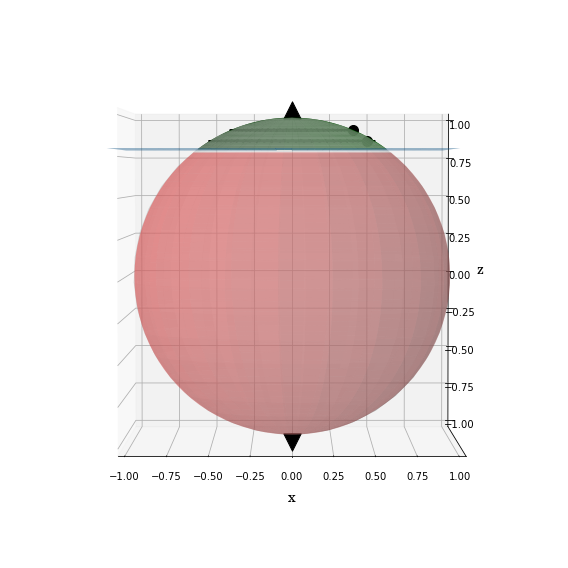

In [7]:
# %matplotlib widget
%matplotlib inline

step = 0.1
t0 = 0
t = 2*np.pi
# TODO: Correct cartesian evolution
dXdt = lambda x, t: np.array([-x[1], x[0], 0])

trange = np.arange(t0, t, step=step)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d',box_aspect=(1,1,1))

plot_S_bloch_regions(ax, True)

for X0, Z0 in start_points:
    dataSet, ts = rk4(X0, t0, t, step, dXdt)
    dataSet = dataSet.T
    xps, yps, zps = dataSet[0], dataSet[1], dataSet[2]

    # ax.plot(xps,yps,zps, label=str(X0), color='black', ls='--')
    plt.quiver(xps[:-1], yps[:-1], zps[:-1], xps[1:]-xps[:-1], yps[1:]-yps[:-1], zps[1:]-zps[:-1], color='black')
    ax.scatter(dataSet.T[0][0],dataSet.T[0][1],dataSet.T[0][2], label=str(dataSet.T[0]), s=100, c='black')
    a = cartesian_evo(np.pi/2,X0)
    b = cartesian_evo(np.pi/2 + 0.01,X0)
    
    z_vec, o_vec = get_states(trange, Z0, had_ham)
    xs, ys, zs, _ = state_to_bloch(z_vec, o_vec)
    if False:
        print("Avg error:")
        for z in [zip(xs, xps), zip(ys, yps), zip(zs,zps)]:
            avg_error = np.mean([abs(i-j) for i,j in z])
            print(avg_error)


plt.axis('on')

# with mpl.cbook.get_sample_data("ket0.png") as file:
#     arr_img0 = plt.imread(file)
# with mpl.cbook.get_sample_data("ket1.png") as file:
#     arr_img1 = plt.imread(file)
# imgs = [arr_img0, arr_img1]
# from ImageAnnotations3D import ImageAnnotations3D
# ax2 = fig.add_subplot(111,frame_on=False)
# ax2.axis("off")
# ax2.axis([0,1,0,1])
# ia = ImageAnnotations3D([[0,0,1.05],[0,0,-1.05]],imgs,ax, ax2 )

fig.tight_layout()
# plt.legend()
# save('S0_normal_bloch.png')

ax.set_yticks([])
ax.set_ylabel('')
ax.azim = -90
ax.elev = 2
# save('S0_side_bloch.png')

# ax.set_zticks([])
# ax.set_zlabel('')
# ax.azim = 270
# ax.elev = 90
# save('S0_above_bloch.png')

plt.show()

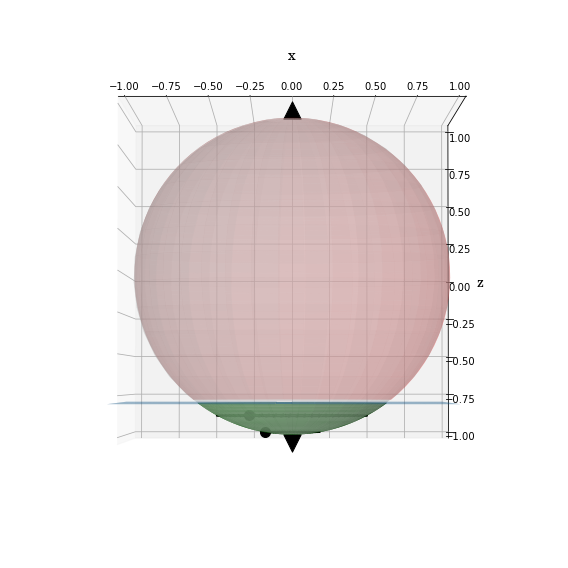

In [8]:
# %matplotlib widget
%matplotlib inline

step = 0.1
t0 = 0
t = 2*np.pi
# TODO: Correct cartesian evolution
dXdt = lambda x, t: np.array([-x[1], x[0], 0])

trange = np.arange(t0, t, step=step)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d',box_aspect=(1,1,1))

plot_S_bloch_regions(ax, True, init=1)

for X0, Z0 in [cart_bloch_near_1() for t in range(2)]:
    dataSet, ts = rk4(X0, t0, t, step, dXdt)
    dataSet = dataSet.T
    xps, yps, zps = dataSet[0], dataSet[1], dataSet[2]

    # ax.plot(xps,yps,zps, label=str(X0), color='black', ls='--')
    plt.quiver(xps[:-1], yps[:-1], zps[:-1], xps[1:]-xps[:-1], yps[1:]-yps[:-1], zps[1:]-zps[:-1], color='black')
    ax.scatter(dataSet.T[0][0],dataSet.T[0][1],dataSet.T[0][2], label=str(dataSet.T[0]), s=100, c='black')
    a = cartesian_evo(np.pi/2,X0)
    b = cartesian_evo(np.pi/2 + 0.01,X0)
    
    z_vec, o_vec = get_states(trange, Z0, had_ham)
    xs, ys, zs, _ = state_to_bloch(z_vec, o_vec)
    if False:
        print("Avg error:")
        for z in [zip(xs, xps), zip(ys, yps), zip(zs,zps)]:
            avg_error = np.mean([abs(i-j) for i,j in z])
            print(avg_error)


plt.axis('on')

# with mpl.cbook.get_sample_data("ket0.png") as file:
#     arr_img0 = plt.imread(file)
# with mpl.cbook.get_sample_data("ket1.png") as file:
#     arr_img1 = plt.imread(file)
# imgs = [arr_img0, arr_img1]
# from ImageAnnotations3D import ImageAnnotations3D
# ax2 = fig.add_subplot(111,frame_on=False)
# ax2.axis("off")
# ax2.axis([0,1,0,1])
# ia = ImageAnnotations3D([[0,0,1.05],[0,0,-1.05]],imgs,ax, ax2 )

fig.tight_layout()
# plt.legend()
# save('S1_normal_bloch.png')
ax.set_yticks([])
ax.set_ylabel('')
ax.azim = -90
ax.elev = -2
# save('S1_side_bloch.png')

# ax.set_zticks([])
# ax.set_zlabel('')
# ax.azim = 270
# ax.elev = 90
# save('S1_above_bloch.png')

plt.show()

# CNOT Hamiltonian

In [9]:
H = [[0,0,0,0],[0,0,0,0],[0,0,np.pi/np.sqrt(2),-np.pi/np.sqrt(2)],[0,0,-np.pi/np.sqrt(2),np.pi/np.sqrt(2)]]
t0 = 0
t = 2 * np.pi
step = 0.01
dzdt = lambda z, t: -1j*np.array(H).dot(z)

def generate_barrier_data():
    r0 = np.random.uniform(0, np.sqrt(0.1))
    r1 = np.random.uniform(np.sqrt(0.9), 1)
    phi, delta = randang(), randang()
    z0 = np.array([r0 * np.exp(1j * delta), np.sqrt(1 - r0**2) * np.exp(1j * phi)])
    phi, delta = randang(), randang()
    z1 = np.array([r1 * np.exp(1j * delta), np.sqrt(1 - r1**2) * np.exp(1j * phi)])
    print("Init: ", z0,z1)
    l = []
    for x in z0:
        for y in z1:
            l.append(x*y)
    Z0 = np.array(l)

    dataSet, ts = rk4(Z0, t0, t, step, dzdt)

    barr = lambda z : 0.9 - z[2] * z[2].conj() - z[3] * z[3].conj()
    b_ds = np.array([barr(d) for d in dataSet])
    return np.real(b_ds), ts

In [92]:
H = [[0,0,0,0],[0,0,0,0],[0,0,np.pi/np.sqrt(2),-np.pi/np.sqrt(2)],[0,0,-np.pi/np.sqrt(2),np.pi/np.sqrt(2)]]
t0 = 0
t = 2 * np.pi
step = 0.01
dzdt = lambda z, t: -1j*np.array(H).dot(z)

def generate_barrier_data():
    Z0 = [0,0,0,0]
    Z0[2] = np.random.uniform(np.sqrt(0.9),1)
    
    Z0[0] = np.random.uniform(0, np.sqrt(0.1))
    upbound = np.sqrt(0.1 - Z0[0]**2)
    Z0[1] = np.random.uniform(0, upbound)
    Z0[3] = np.sqrt(upbound - Z0[1]**2)
    
    phi = [randang() for i in range(4)]
    Z0 = [Z0[i] * np.exp(1j*phi[i]) for i in range(4)]
    
    Z0 = np.array(Z0)
    dataSet, ts = rk4(Z0, t0, t, step, dzdt)

    barr = lambda z : 0.9 - z[2] * z[2].conj() - z[3] * z[3].conj()
    b_ds = np.array([barr(d) for d in dataSet])
    return np.real(b_ds), ts

[-0.36381926 -0.36381926 -0.36381926 -0.36381926 -0.36381926 -0.36381926
 -0.36381926 -0.36381926 -0.36381926 -0.36381926]
[-0.05806027 -0.05806027 -0.05806027 -0.05806027 -0.05806027 -0.05806027
 -0.05806027 -0.05806027 -0.05806027 -0.05806027]
[-0.21774832 -0.21774832 -0.21774832 -0.21774832 -0.21774832 -0.21774832
 -0.21774832 -0.21774832 -0.21774832 -0.21774832]
[-0.28786618 -0.28786618 -0.28786618 -0.28786618 -0.28786618 -0.28786618
 -0.28786618 -0.28786618 -0.28786618 -0.28786618]
[-0.30505792 -0.30505792 -0.30505792 -0.30505792 -0.30505792 -0.30505792
 -0.30505792 -0.30505792 -0.30505792 -0.30505792]
[-0.13431488 -0.13431488 -0.13431488 -0.13431488 -0.13431488 -0.13431488
 -0.13431488 -0.13431488 -0.13431488 -0.13431488]
[-0.23622804 -0.23622804 -0.23622804 -0.23622804 -0.23622804 -0.23622804
 -0.23622804 -0.23622804 -0.23622804 -0.23622804]
[-0.27403168 -0.27403168 -0.27403168 -0.27403168 -0.27403168 -0.27403168
 -0.27403168 -0.27403168 -0.27403168 -0.27403168]
[-0.33845003 -0.

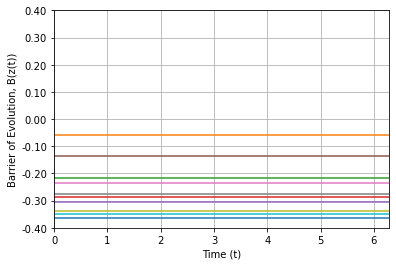

<Figure size 432x288 with 0 Axes>

In [106]:
x = []
for i in range(10):
    b_ds, ts = generate_barrier_data()
    print(b_ds[-10:])
    x.append(b_ds)

fig = plt.figure()
ax = fig.add_subplot()

for b in x:
    ax.plot(ts, b)

b = .4
plt.ylim(-b,b)
plt.xlim(0, 2*np.pi)
plt.xlabel("Time (t)")
plt.ylabel("Barrier of Evolution, B(z(t))")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.grid()
plt.show()
# save('CNOT_barrier.png')